# Data Exploration
Exploring our model features and target variable 

In [61]:
import sys
sys.path.append(r'../.')

import numpy as np
import pandas as pd
import save as sv
import capture as cp

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import os
dp = os.environ.get('pub_data')
plt.style.use('default')

In [62]:
# Read dataset
data = pd.read_csv(dp + 'giteval.csv',index_col=0)
print(len(data))
data.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell', ...",10,1,437,0,0.25,6.15,3.5,4.5,4.0
1,0,0,0,1,0.00,[],0,0,1,159,0.00,0.00,0.0,0.0,0.0
2,12,1,182,0,-1.00,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell']",5,0,433,3,0.23,36.08,4.0,3.0,3.5
3,13,31,0,17,0.00,"['PHP', 'HTML', 'JavaScript']",3,0,20,0,0.50,1.54,2.0,2.0,2.0
4,99,344,370,16,23.12,"['C', 'JavaScript', 'Go', 'CMake', 'Jupyter No...",10,0,255,6,0.02,2.58,5.0,3.0,4.0


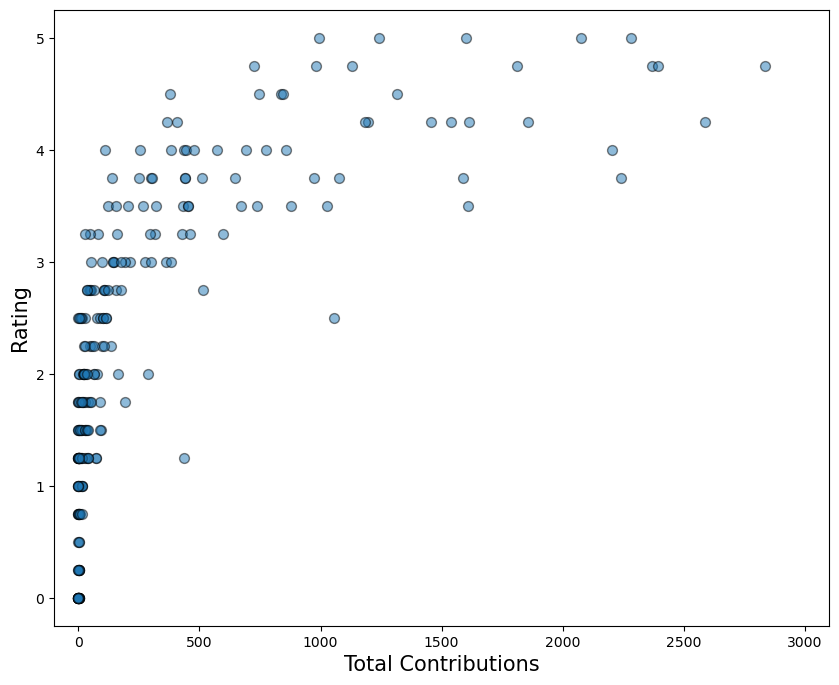

In [64]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['n_cont'],data['y'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

#plt.plot(cont_stats['n_cont']['mean'],'r--',label='Mean')
plt.xlabel("Total Contributions",size=15)
plt.ylabel('Rating',size=15)
plt.xlim(-100,3100)
#plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/cont_rating.png',format='png')

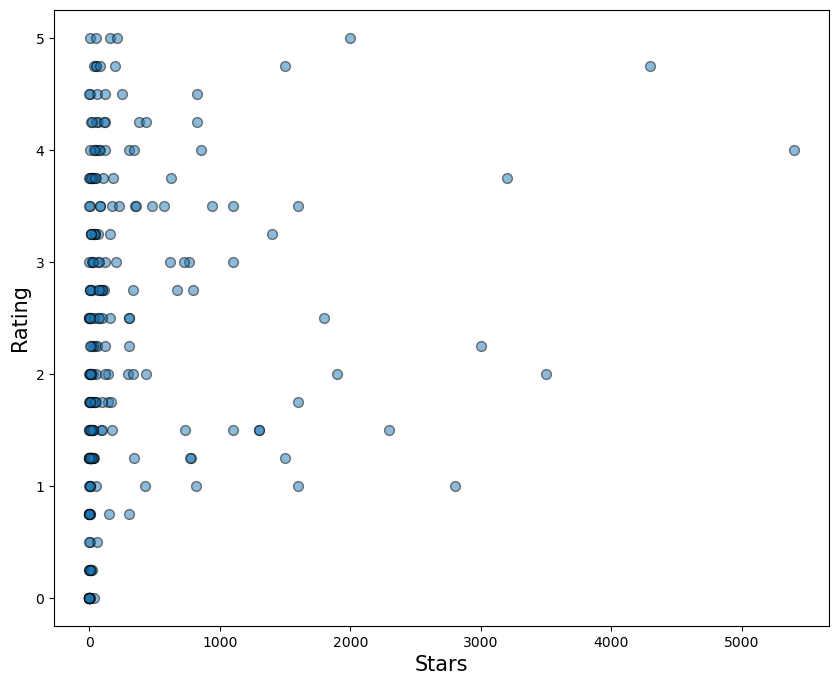

In [65]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['stars'],data['y'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

#plt.plot(cont_stats['n_cont']['mean'],'r--',label='Mean')
plt.xlabel("Stars",size=15)
plt.ylabel('Rating',size=15)
#plt.xlim(-100,3100)
#plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/cont_rating.png',format='png')

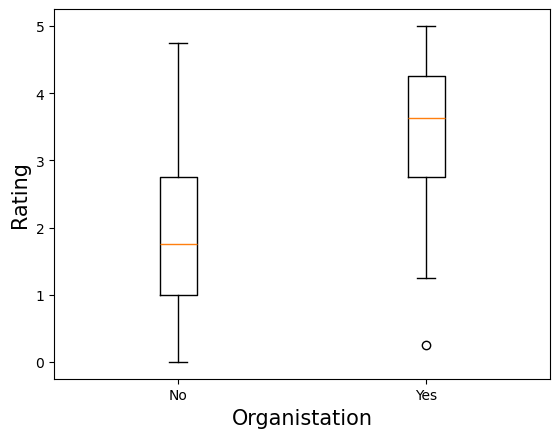

In [66]:
org_0 = data[data.org_flag == 0]['y']
org_1 = data[data.org_flag == 1]['y']

org = [org_0,org_1]
fig, ax = plt.subplots()
#ax.set_title('Organisation Flag',size=20)

ax.boxplot(org,labels=['No','Yes'])
plt.ylabel("Rating",size=15)


plt.xlabel('Organistation',size=15)

plt.show()

In [67]:
print(np.mean(data[data.n_cont>=500]['org_flag']))
print(np.mean(data[data.n_cont<500]['org_flag']))

0.6976744186046512
0.20320855614973263


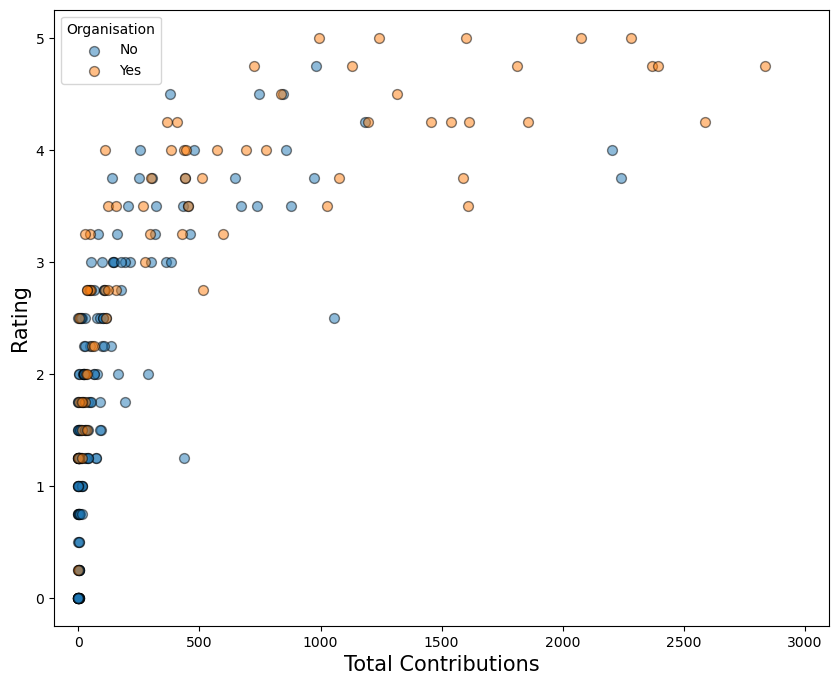

In [68]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter('n_cont','y',data=data[data.org_flag==0], s=50,alpha=0.5,edgecolors='#000000',label = 'No')
plt.scatter('n_cont','y',data=data[data.org_flag==1], s=50,alpha=0.5,edgecolors='#000000',label = 'Yes')

#plt.plot(cont_stats['n_cont']['mean'],'r--',label='Mean')
plt.xlabel("Total Contributions",size=15)
plt.ylabel('Rating',size=15)
plt.xlim(-100,3100)
plt.legend(loc= 2,prop={'size': 10},title='Organisation')


plt.savefig('../../../figures/cont_rating.png',format='png')

## Target Variable 
Obtain the GitHub profile ratings

In [69]:
data[['r1','r2','y']].head()

,r1,r2,y
0,3.5,4.5,4.0
1,0.0,0.0,0.0
2,4.0,3.0,3.5
3,2.0,2.0,2.0
4,5.0,3.0,4.0


In [70]:
print(round(np.mean(data['r1']),2))
print(round(np.mean(data['r2']),2))
print(round(np.mean(data['y']),2))

2.51
2.13
2.32


In [71]:
r1_count = round(data['r1']).value_counts().sort_index()
r2_count = round(data['r2']).value_counts().sort_index()

<BarContainer object of 6 artists>

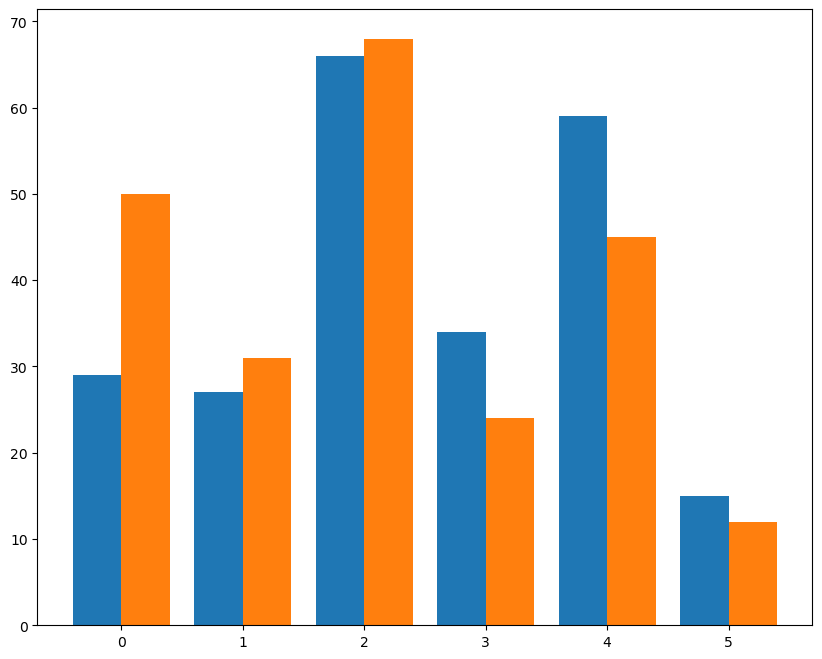

In [72]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))
width = 0.4
plt.bar(r1_count.index-width/2,r1_count,width= width, label = 'Rating 1')
plt.bar(r2_count.index+width/2,r2_count,width= width, label = 'Rating 2')

In [73]:
np.corrcoef(data['r1'],data['r2'])

array([[1.        , 0.80799819],
       [0.80799819, 1.        ]])

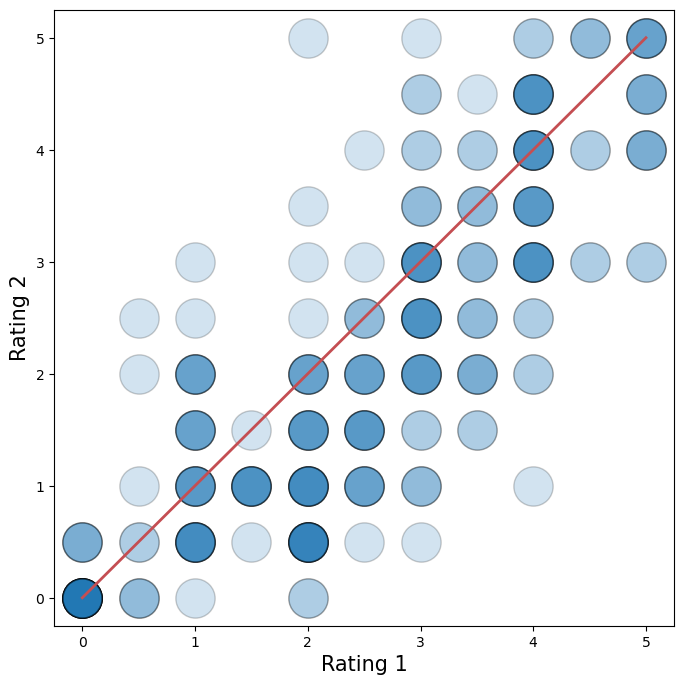

In [74]:
plt.subplots(nrows=1, ncols=1,figsize=(8,8))
plt.scatter(data['r1'],data['r2'],s=800,alpha=0.2,edgecolors='#000000')
plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)

plt.plot([0, 5], [0, 5], 'r-', lw=2)

plt.savefig('../../../figures/ratings_consistency.png',format='png')

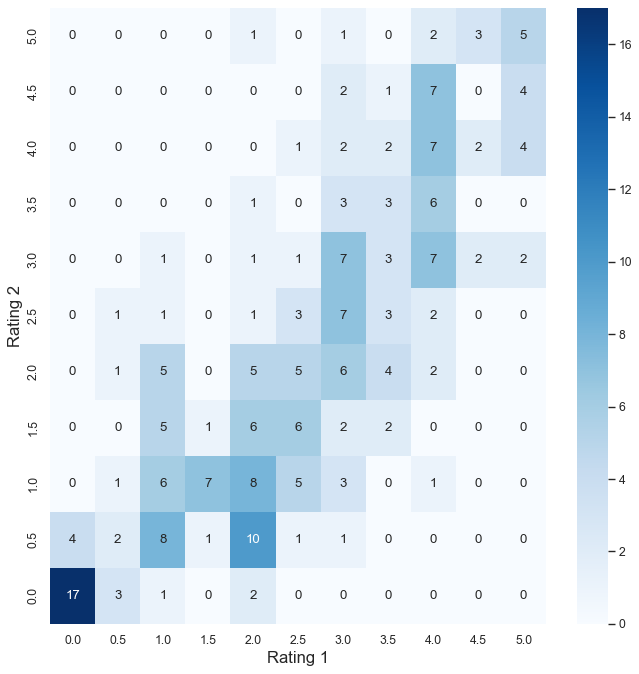

In [75]:
labels = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]


mat = []
for i in labels:
    vec = []
    for j in labels:
        vec.append(len(data[(data.r2==i) & (data.r1==j)]))
    mat.append(vec)
    
mat_df = pd.DataFrame(mat,columns=labels,index=labels)

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1)

ax = plt.axes()
sns.heatmap(mat_df,cmap="Blues",ax=ax,annot=True,fmt='.5g')

plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)
ax.invert_yaxis()

plt.savefig('../../../figures/ratings_consistency2.png',format='png')

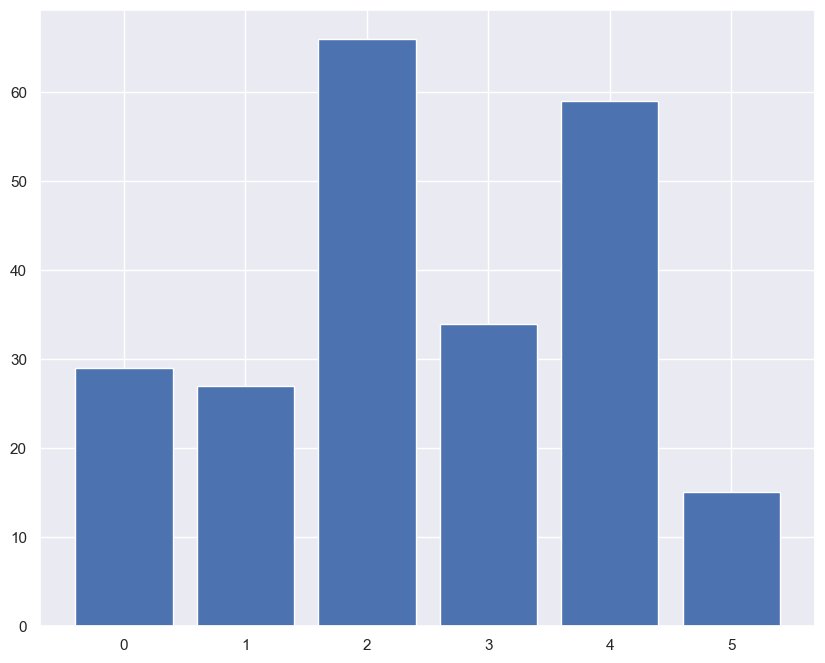

In [76]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))
width = 0.8
plt.bar(r1_count.index,r1_count,width= width, label = 'Rating 1')

plt.savefig('../../../figures/ratings_final.png',format='png')

# Features

## Contributions

In [78]:
cont_stats = data[['n_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['n_cont']

,count,min,max,mean
y,,,,
0.00,17,0,2,0.470588
0.25,7,0,4,1.285714
0.50,3,0,3,1.333333
0.75,9,0,13,2.777778
1.00,9,0,16,5.777778
1.25,23,0,435,33.695652
1.50,16,0,94,24.625000
1.75,13,0,193,39.769231
2.00,15,1,287,57.333333


In [26]:
cont_stats = data[data['n_cont']!=8036][['n_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['n_cont']

,count,min,max,mean
y,,,,
0.00,17,0,2,0.470588
0.25,7,0,4,1.285714
0.50,3,0,3,1.333333
0.75,9,0,13,2.777778
1.00,9,0,16,5.777778
1.25,23,0,435,33.695652
1.50,16,0,94,24.625000
1.75,13,0,193,39.769231
2.00,15,1,287,57.333333


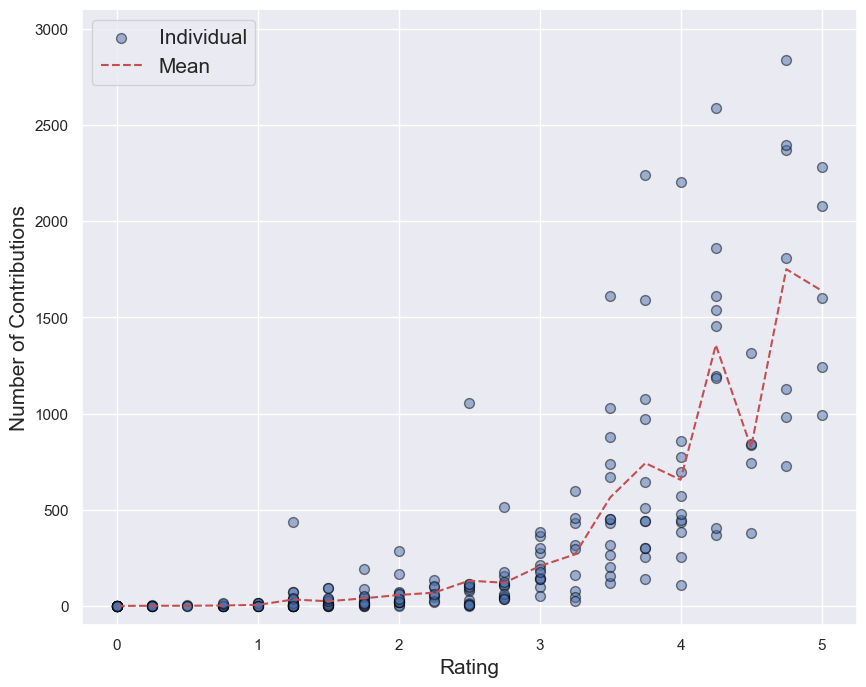

In [27]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['n_cont'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['n_cont']['mean'],'r--',label='Mean')
plt.ylabel("Number of Contributions",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-100,3100)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/cont_rating.png',format='png')

In [28]:
cont_stats = data[['last_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['last_cont']

,count,min,max,mean
y,,,,
0.00,17,0,170,39.294118
0.25,7,0,303,118.571429
0.50,3,0,159,54.333333
0.75,9,0,270,86.333333
1.00,9,0,207,58.111111
1.25,23,0,308,74.000000
1.50,16,0,181,37.812500
1.75,13,0,281,83.846154
2.00,15,0,225,45.200000


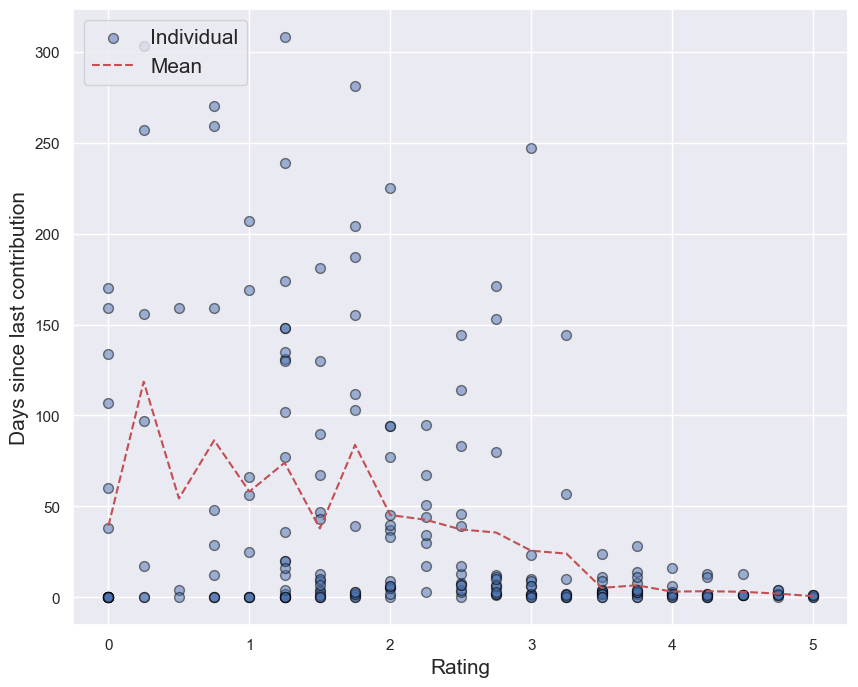

In [29]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['last_cont'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['last_cont']['mean'],'r--',label='Mean')
plt.ylabel("Days since last contribution",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-100,3100)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/cont_rating.png',format='png')

In [30]:
cont_stats = data[data['stab_cont']!=8036][['stab_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['stab_cont']

,count,min,max,mean
y,,,,
0.00,17,0.00,1.00,0.117647
0.25,7,0.00,1.00,0.142857
0.50,3,0.00,1.00,0.333333
0.75,9,0.00,1.00,0.305556
1.00,9,0.00,1.00,0.244444
1.25,23,0.00,1.00,0.181304
1.50,16,0.00,0.97,0.283125
1.75,13,0.00,0.59,0.137692
2.00,15,0.00,1.00,0.254000


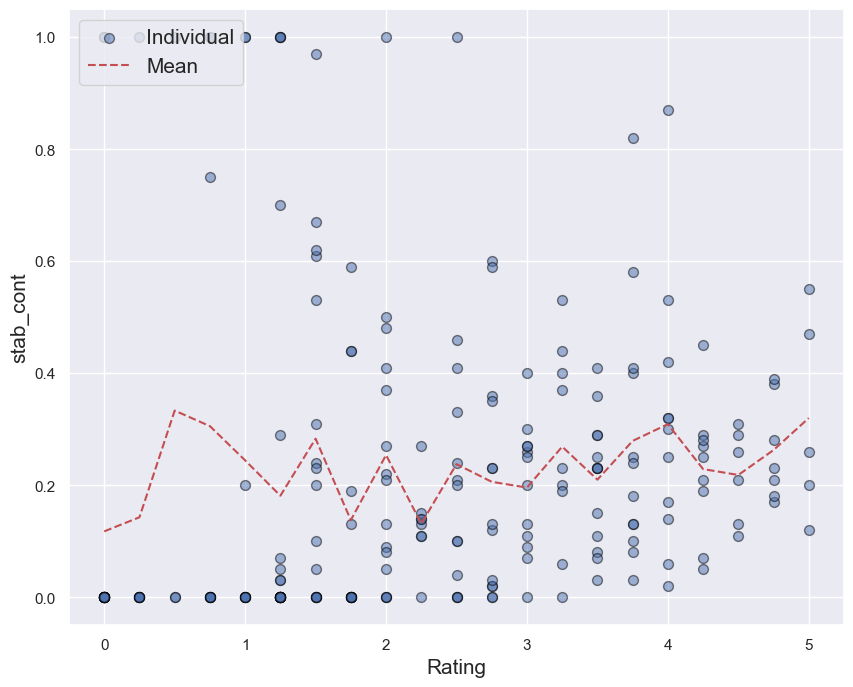

In [31]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['stab_cont'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['stab_cont']['mean'],'r--',label='Mean')
plt.ylabel("stab_cont",size=15)
plt.xlabel('Rating',size=15)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/stab_cont_rating.png',format='png')

# Repos

In [32]:
repos_stats = data[['repos','y']].groupby('y').agg(['count','min','max','mean'])
repos_stats['repos']

,count,min,max,mean
y,,,,
0.00,17,0,10,1.470588
0.25,7,0,2,1.142857
0.50,3,7,55,24.666667
0.75,9,1,93,22.222222
1.00,9,1,3300,580.000000
1.25,23,2,1200,103.739130
1.50,16,4,267,53.500000
1.75,13,2,80,29.384615
2.00,15,2,47,17.800000


In [33]:
repos_stats = data[data['repos']<500][['repos','y']].groupby('y').agg(['count','min','max','mean'])
repos_stats['repos']

,count,min,max,mean
y,,,,
0.00,17,0,10,1.470588
0.25,7,0,2,1.142857
0.50,3,7,55,24.666667
0.75,9,1,93,22.222222
1.00,7,1,95,17.142857
1.25,21,2,189,25.904762
1.50,16,4,267,53.500000
1.75,13,2,80,29.384615
2.00,15,2,47,17.800000


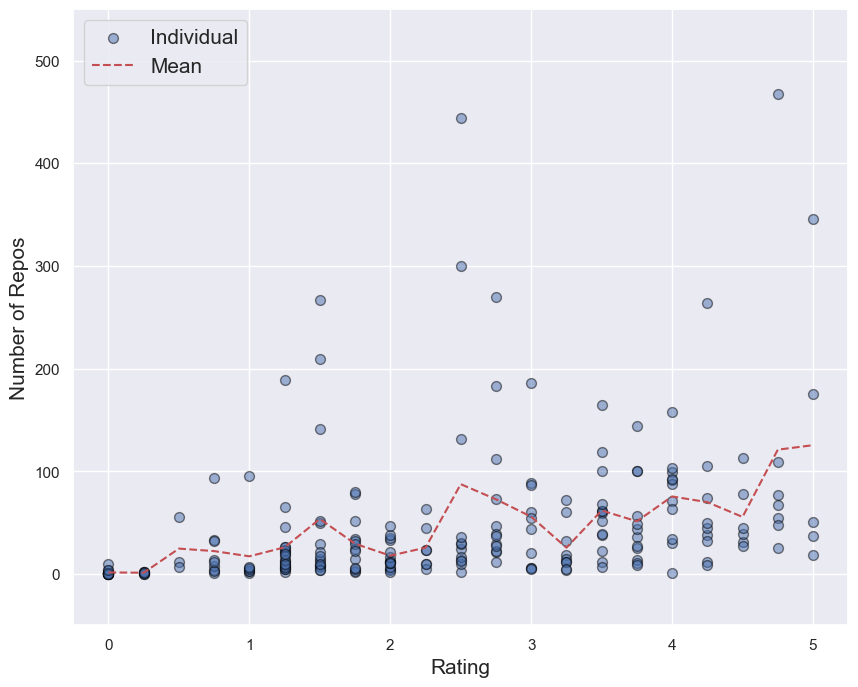

In [35]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['repos'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(repos_stats['repos']['mean'],'r--',label='Mean')
plt.ylabel("Number of Repos",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-50,550)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/repo_rating.png',format='png')

In [36]:
cont_stats = data[data['cont_repo_ratio']!=8036][['cont_repo_ratio','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['cont_repo_ratio']

,count,min,max,mean
y,,,,
0.00,17,0.00,2.00,0.241176
0.25,7,0.00,2.00,0.428571
0.50,3,0.00,0.25,0.130000
0.75,9,0.00,1.08,0.295556
1.00,9,0.00,5.00,1.276667
1.25,23,0.00,18.50,1.850000
1.50,16,0.00,3.88,0.876250
1.75,13,0.00,5.68,1.523077
2.00,15,0.50,41.25,6.348667


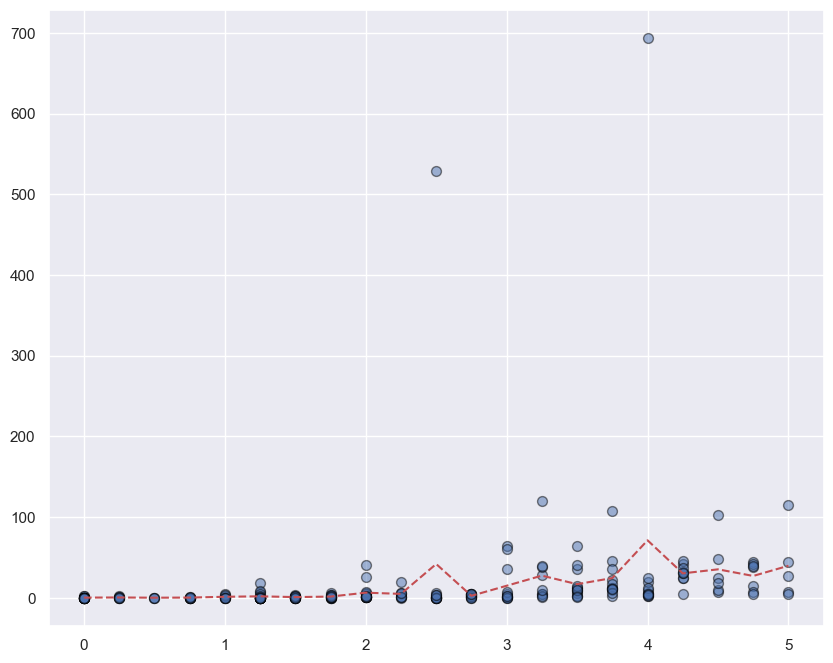

In [37]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['cont_repo_ratio'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['cont_repo_ratio']['mean'],'r--',label='Mean')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


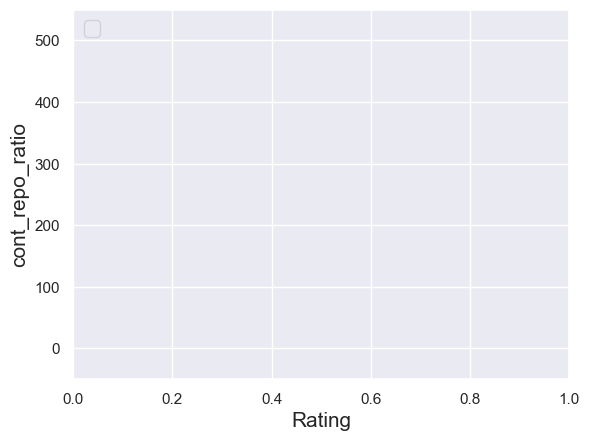

In [38]:


plt.ylabel("cont_repo_ratio",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-50,550)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/repo_rating.png',format='png')

# Stars

In [39]:
stats = data[['stars','y']].groupby('y').agg(['count','min','max','mean'])
stats['stars']

,count,min,max,mean
y,,,,
0.00,17,0,38,2.588235
0.25,7,0,21,7.285714
0.50,3,0,55,19.666667
0.75,9,0,303,51.777778
1.00,9,0,2800,634.000000
1.25,23,0,1500,156.782609
1.50,16,0,2300,450.000000
1.75,13,0,1600,168.461538
2.00,15,0,3500,456.133333


In [40]:
stats = data[data['stars']<1000][['stars','y']].groupby('y').agg(['count','min','max','mean'])
stats['stars']

,count,min,max,mean
y,,,,
0.00,17,0,38,2.588235
0.25,7,0,21,7.285714
0.50,3,0,55,19.666667
0.75,9,0,303,51.777778
1.00,7,0,821,186.571429
1.25,22,0,781,95.727273
1.50,12,0,730,100.000000
1.75,12,0,169,49.166667
2.00,13,0,431,110.923077


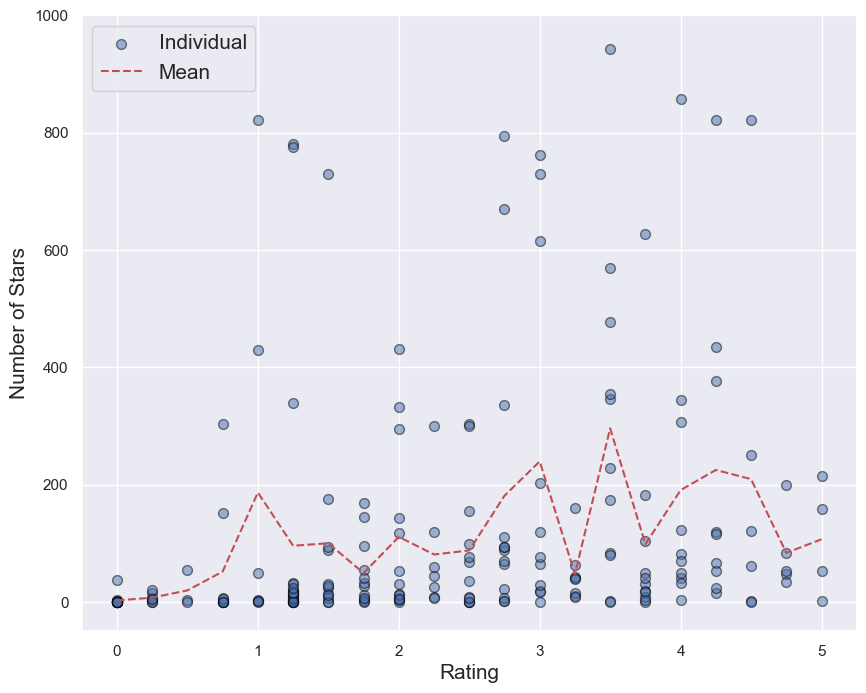

In [41]:
stats = data[data['stars']<1000][['stars','y']].groupby('y').agg(['count','min','max','mean'])
stats['stars']

plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['stars'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['stars']['mean'],'r--',label='Mean')
plt.ylabel("Number of Stars",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/stars_rating.png',format='png')

# Organisations

In [42]:
org_0 = data[data.org_flag == 0]['y']
org_1 = data[data.org_flag == 1]['y']

In [43]:
org_0.value_counts().sort_index()

y
0.00    17
0.25     6
0.50     3
0.75     9
1.00     9
1.25    21
1.50    14
1.75    10
2.00    13
2.25     6
2.50    11
2.75     5
3.00    11
3.25     4
3.50     7
3.75     7
4.00     4
4.25     1
4.50     3
4.75     1
Name: count, dtype: int64

In [44]:
org_1.value_counts().sort_index()

y
0.25    1
1.25    2
1.50    2
1.75    3
2.00    2
2.25    2
2.50    2
2.75    8
3.00    1
3.25    5
3.50    6
3.75    5
4.00    7
4.25    8
4.50    3
4.75    6
5.00    5
Name: count, dtype: int64

In [45]:
print(np.mean())
print(np.mean(data[data.org_flag == 1]['y']))

TypeError: _mean_dispatcher() missing 1 required positional argument: 'a'

In [46]:
org_0

1      0.00
2      3.50
3      2.00
4      4.00
6      2.75
       ... 
223    2.00
225    0.00
226    4.75
227    0.00
228    1.25
Name: y, Length: 162, dtype: float64

In [47]:
org_1

0      4.00
5      4.25
11     4.75
13     4.25
19     2.25
       ... 
216    2.25
219    3.25
221    0.25
224    4.00
229    4.50
Name: y, Length: 68, dtype: float64

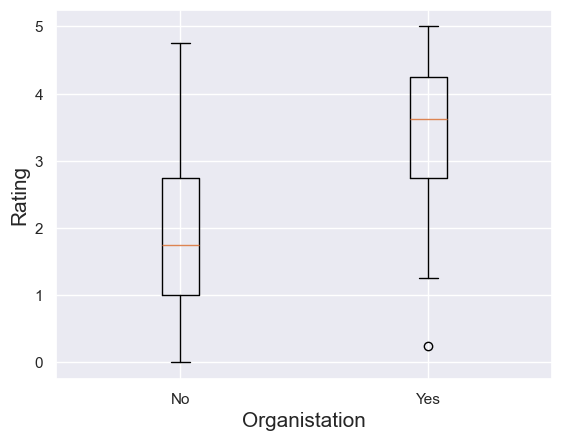

In [48]:
org = [org_0,org_1]
fig, ax = plt.subplots()
#ax.set_title('Organisation Flag',size=20)

ax.boxplot(org,labels=['No','Yes'])
plt.ylabel("Rating",size=15)


plt.xlabel('Organistation',size=15)

plt.show()

# Followers & Following

In [49]:
data

,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell', ...",10,1,437,0,0.25,6.15,3.5,4.5,4.00
1,0,0,0,1,0.00,[],0,0,1,159,0.00,0.00,0.0,0.0,0.00
2,12,1,182,0,-1.00,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell']",5,0,433,3,0.23,36.08,4.0,3.0,3.50
3,13,31,0,17,0.00,"['PHP', 'HTML', 'JavaScript']",3,0,20,0,0.50,1.54,2.0,2.0,2.00
4,99,344,370,16,23.12,"['C', 'JavaScript', 'Go', 'CMake', 'Jupyter No...",10,0,255,6,0.02,2.58,5.0,3.0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,0,0,3,0.00,[],0,0,0,0,0.00,0.00,0.0,0.0,0.00
226,25,83,9900,28,353.57,"['CSS', 'HTML', 'JavaScript']",3,0,983,4,0.39,39.32,5.0,4.5,4.75
227,4,0,0,1,0.00,"['Java', 'HTML', 'C', 'JavaScript']",4,0,0,0,0.00,0.00,0.0,0.0,0.00
228,10,0,3,0,-1.00,"['JavaScript', 'Lua', 'C#', 'Python', 'Java', ...",6,0,2,130,0.00,0.20,2.0,0.5,1.25


In [50]:
stats = data[['followers','y']].groupby('y').agg(['count','min','max','mean'])
stats['followers']

,count,min,max,mean
y,,,,
0.00,17,0,14,1.411765
0.25,7,0,12,2.714286
0.50,3,2,37,14.000000
0.75,9,0,24,4.777778
1.00,9,0,135,30.333333
1.25,23,0,141,15.434783
1.50,16,2,1000,84.875000
1.75,13,2,156,20.615385
2.00,15,0,158,22.266667


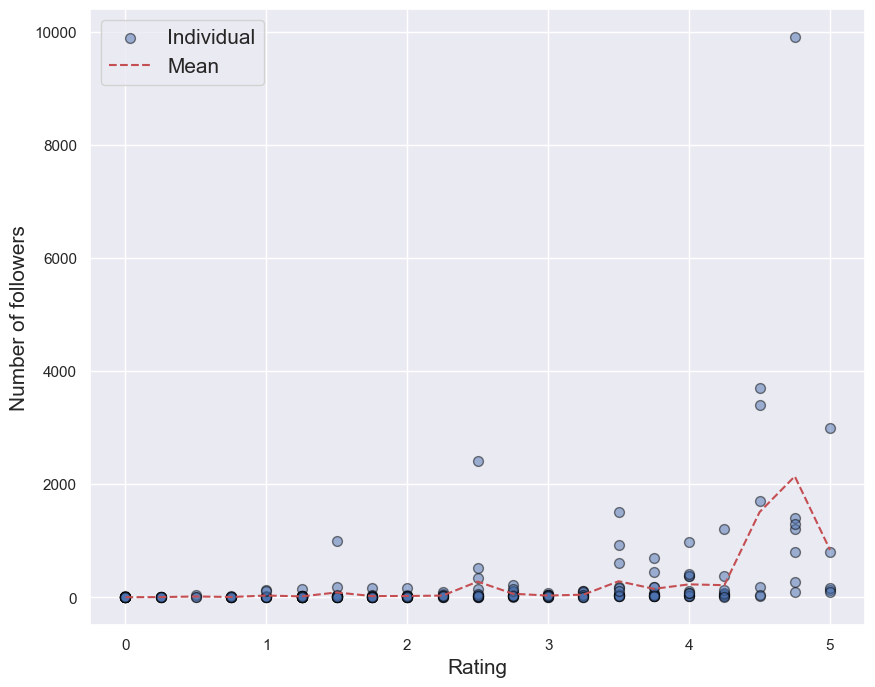

In [51]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['followers'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['followers']['mean'],'r--',label='Mean')
plt.ylabel("Number of followers",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/followers_rating.png',format='png')

In [52]:
stats = data[['following','y']].groupby('y').agg(['count','min','max','mean'])
stats['following']

,count,min,max,mean
y,,,,
0.00,17,0,525,49.117647
0.25,7,1,21,8.142857
0.50,3,1,11,6.666667
0.75,9,1,97,19.888889
1.00,9,0,6600,833.333333
1.25,23,0,527,53.739130
1.50,16,0,4100,894.500000
1.75,13,0,788,94.076923
2.00,15,0,182,36.866667


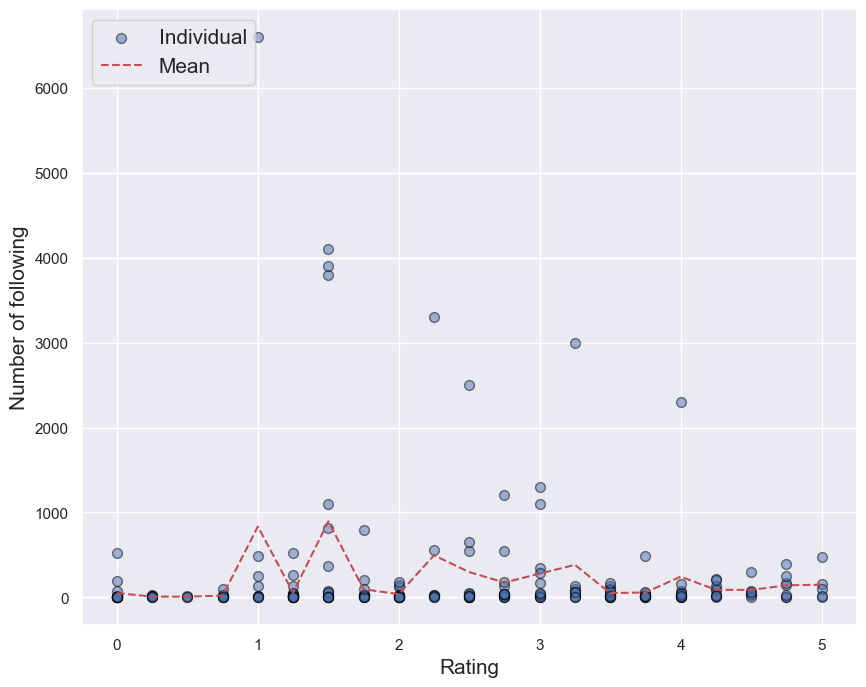

In [53]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['following'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['following']['mean'],'r--',label='Mean')
plt.ylabel("Number of following",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/following_rating.png',format='png')

In [54]:
stats = data[data.foll_ratio<1000][['foll_ratio','y']].groupby('y').agg(['count','min','max','mean'])
stats['foll_ratio']

,count,min,max,mean
y,,,,
0.00,17,-1.00,1.50,-0.003529
0.25,7,0.00,6.00,0.948571
0.50,3,0.38,3.36,1.913333
0.75,9,0.00,2.00,0.400000
1.00,9,-1.00,2.00,0.178889
1.25,23,-1.00,5.00,0.966087
1.50,16,-1.00,3.00,0.409375
1.75,13,-1.00,6.24,0.765385
2.00,15,-1.00,31.60,3.634667


In [55]:
data[data.foll_ratio<1000]['foll_ratio']

0       11.78
1        0.00
2       -1.00
3        0.00
4       23.12
        ...  
225      0.00
226    353.57
227      0.00
228     -1.00
229      0.10
Name: foll_ratio, Length: 229, dtype: float64

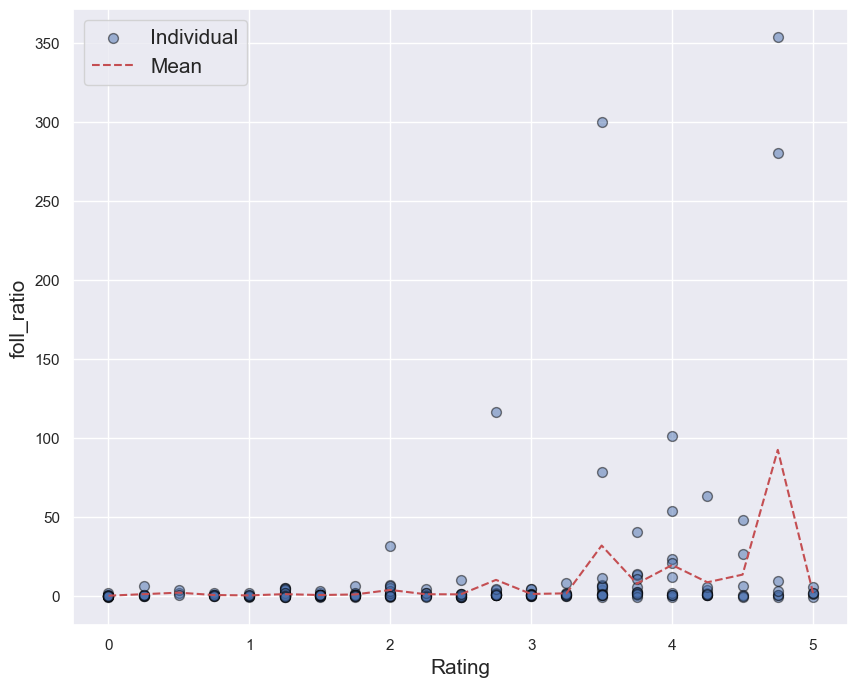

In [56]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data[data.foll_ratio<1000]['y'],data[data.foll_ratio<1000]['foll_ratio'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['foll_ratio']['mean'],'r--',label='Mean')
plt.ylabel("foll_ratio",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/followers_rating.png',format='png')

# Languges

In [57]:
stats = data[data.foll_ratio<1000][['n_lang','y']].groupby('y').agg(['count','min','max','mean'])
stats['n_lang']

,count,min,max,mean
y,,,,
0.00,17,0,4,0.588235
0.25,7,0,2,1.000000
0.50,3,2,7,4.000000
0.75,9,1,9,4.555556
1.00,9,1,10,4.444444
1.25,23,1,13,5.608696
1.50,16,1,10,5.812500
1.75,13,1,12,5.384615
2.00,15,2,9,5.133333


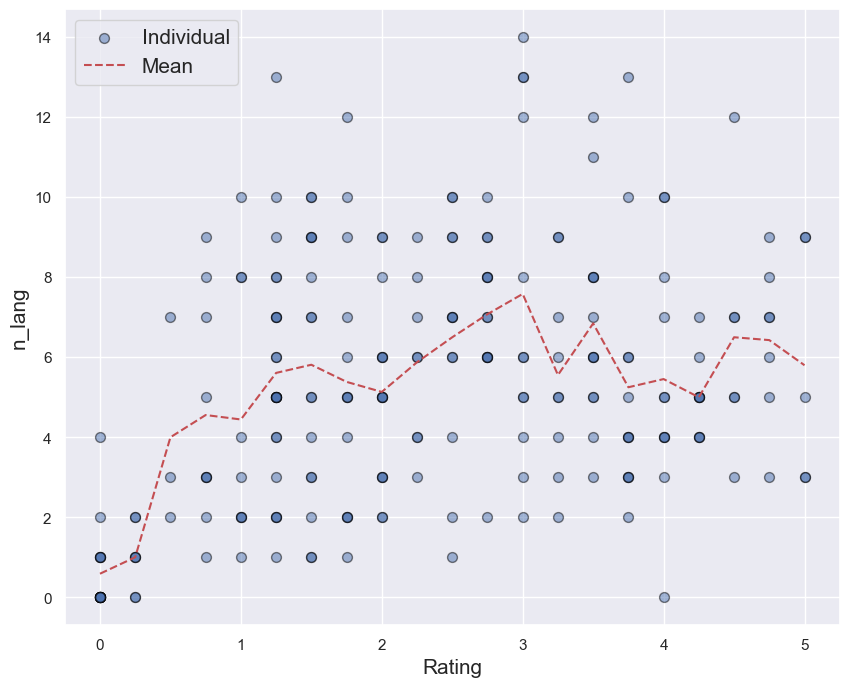

In [59]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data[data.foll_ratio<1000]['y'],data[data.foll_ratio<1000]['n_lang'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['n_lang']['mean'],'r--',label='Mean')
plt.ylabel("n_lang",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../../../figures/followers_rating.png',format='png')

# Correlations

In [60]:
data

,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell', ...",10,1,437,0,0.25,6.15,3.5,4.5,4.00
1,0,0,0,1,0.00,[],0,0,1,159,0.00,0.00,0.0,0.0,0.00
2,12,1,182,0,-1.00,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell']",5,0,433,3,0.23,36.08,4.0,3.0,3.50
3,13,31,0,17,0.00,"['PHP', 'HTML', 'JavaScript']",3,0,20,0,0.50,1.54,2.0,2.0,2.00
4,99,344,370,16,23.12,"['C', 'JavaScript', 'Go', 'CMake', 'Jupyter No...",10,0,255,6,0.02,2.58,5.0,3.0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,0,0,3,0.00,[],0,0,0,0,0.00,0.00,0.0,0.0,0.00
226,25,83,9900,28,353.57,"['CSS', 'HTML', 'JavaScript']",3,0,983,4,0.39,39.32,5.0,4.5,4.75
227,4,0,0,1,0.00,"['Java', 'HTML', 'C', 'JavaScript']",4,0,0,0,0.00,0.00,0.0,0.0,0.00
228,10,0,3,0,-1.00,"['JavaScript', 'Lua', 'C#', 'Python', 'Java', ...",6,0,2,130,0.00,0.20,2.0,0.5,1.25
